In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram


def process_and_save_txt_file(file_path, output_folder):
    data = np.loadtxt(file_path)

    fs = 178  
    f, t, Sxx = spectrogram(data, fs)

    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, np.log(Sxx + 1e-10), cmap='viridis')
    plt.axis('off') 

    file_name = os.path.splitext(os.path.basename(file_path))[0]
    image_path = os.path.join(output_folder, f'{file_name}_spectrogram.png')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0)
    plt.close()
    print(f"Saved: {file_name}_spectrogram.png")

main_directory = '/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data'

for folder_name in ['A', 'B', 'C', 'D', 'E']:
    folder_path = os.path.join(main_directory, folder_name)
    output_folder = os.path.join(main_directory, f'{folder_name}_images')
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(folder_path):
        if folder_name == 'C' and filename.endswith('.TXT'): 
            file_path = os.path.join(folder_path, filename)
            process_and_save_txt_file(file_path, output_folder)
            print(f"Processed: {filename}")
        elif filename.endswith('.txt'):  
            file_path = os.path.join(folder_path, filename)
            process_and_save_txt_file(file_path, output_folder)
            print(f"Processed: {filename}")

    print(f"Folder {folder_name} processed. Images saved in: {output_folder}")

Saved: Z038_spectrogram.png
Processed: Z038.txt
Saved: Z004_spectrogram.png
Processed: Z004.txt
Saved: Z010_spectrogram.png
Processed: Z010.txt
Saved: Z011_spectrogram.png
Processed: Z011.txt
Saved: Z005_spectrogram.png
Processed: Z005.txt
Saved: Z039_spectrogram.png
Processed: Z039.txt
Saved: Z013_spectrogram.png
Processed: Z013.txt
Saved: Z007_spectrogram.png
Processed: Z007.txt
Saved: Z006_spectrogram.png
Processed: Z006.txt
Saved: Z012_spectrogram.png
Processed: Z012.txt
Saved: Z016_spectrogram.png
Processed: Z016.txt
Saved: Z002_spectrogram.png
Processed: Z002.txt
Saved: Z003_spectrogram.png
Processed: Z003.txt
Saved: Z017_spectrogram.png
Processed: Z017.txt
Saved: Z001_spectrogram.png
Processed: Z001.txt
Saved: Z015_spectrogram.png
Processed: Z015.txt
Saved: Z029_spectrogram.png
Processed: Z029.txt
Saved: Z028_spectrogram.png
Processed: Z028.txt
Saved: Z014_spectrogram.png
Processed: Z014.txt
Saved: Z067_spectrogram.png
Processed: Z067.txt
Saved: Z073_spectrogram.png
Processed: Z

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [15]:
base_dir = '/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/spectrograms'

class_names = ['A_images', 'B_images', 'C_images', 'D_images', 'E_images']
class_paths = [os.path.join(base_dir, class_name) for class_name in class_names]

In [16]:
datagen = ImageDataGenerator(
    rescale=1./255,          
    validation_split=0.2      
)

In [17]:
img_height, img_width = 224, 224  
batch_size = 16
num_classes = len(class_names)    

# Training generator
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes=class_names,
    class_mode='categorical',    
    subset='training',
    shuffle=True,
    seed=42
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes=class_names,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [18]:
def build_simple_cnn(input_shape, num_classes):
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [19]:
input_shape = (img_height, img_width, 3) 

model = build_simple_cnn(input_shape, num_classes)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',   
    metrics=['accuracy']
)

model.summary()

/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,                    
    restore_best_weights=True,      
    verbose=1
)

callbacks = [early_stop]

In [21]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size


history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,                      
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30


/opt/anaconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.2271 - loss: 1.6620 - val_accuracy: 0.2083 - val_loss: 1.5757
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.5006
Epoch 3/30


2024-12-27 21:54:23.450911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-12-27 21:54:23.471059: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.3136 - loss: 1.5505 - val_accuracy: 0.4688 - val_loss: 1.4304
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 1.2905
Epoch 5/30


2024-12-27 21:54:28.811421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:54:28.829318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.4320 - loss: 1.3789 - val_accuracy: 0.4375 - val_loss: 1.2250
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 1.3181
Epoch 7/30


2024-12-27 21:54:34.301108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:54:34.320739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.4733 - loss: 1.2113 - val_accuracy: 0.5208 - val_loss: 1.0479
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 1.1003
Epoch 9/30


2024-12-27 21:54:39.742229: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:54:39.760534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.5257 - loss: 1.0713 - val_accuracy: 0.6562 - val_loss: 0.8754
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.8117
Epoch 11/30


2024-12-27 21:54:45.165447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:54:45.183767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.5910 - loss: 0.9634 - val_accuracy: 0.7292 - val_loss: 0.8022
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.4500
Epoch 13/30


2024-12-27 21:54:50.481715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:54:50.501221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.6834 - loss: 0.7795 - val_accuracy: 0.6042 - val_loss: 0.8017
Epoch 14/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.4072
Epoch 15/30


2024-12-27 21:54:55.762914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:54:55.783798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.7071 - loss: 0.7061 - val_accuracy: 0.6354 - val_loss: 0.8277
Epoch 16/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2215
Epoch 17/30


2024-12-27 21:55:01.241308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:55:01.259272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.7299 - loss: 0.6664 - val_accuracy: 0.6875 - val_loss: 0.6939
Epoch 18/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0873
Epoch 19/30


2024-12-27 21:55:06.587029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:55:06.605846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.7188 - loss: 0.6474 - val_accuracy: 0.7604 - val_loss: 0.6512
Epoch 20/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1846
Epoch 21/30


2024-12-27 21:55:11.936688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:55:11.955534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.7710 - loss: 0.5510 - val_accuracy: 0.7083 - val_loss: 0.6555
Epoch 22/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1188
Epoch 23/30


2024-12-27 21:55:17.449116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:55:17.467143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.8031 - loss: 0.4978 - val_accuracy: 0.6979 - val_loss: 0.6642
Epoch 24/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0482
Epoch 25/30


2024-12-27 21:55:23.335968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:55:23.356047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.8151 - loss: 0.5060 - val_accuracy: 0.7083 - val_loss: 0.6499
Epoch 26/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0580
Epoch 27/30


2024-12-27 21:55:29.003465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:55:29.022172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.8108 - loss: 0.4463 - val_accuracy: 0.7708 - val_loss: 0.6429
Epoch 28/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0566
Epoch 29/30


2024-12-27 21:55:34.392009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:55:34.410572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.8568 - loss: 0.3868 - val_accuracy: 0.6875 - val_loss: 0.7085
Epoch 30/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0457
Restoring model weights from the end of the best epoch: 30.


2024-12-27 21:55:39.928905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-27 21:55:39.947986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [22]:
val_loss, val_accuracy = model.evaluate(
    validation_generator,
    steps=validation_steps,
    verbose=0
)

print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Loss: 0.7085
Validation Accuracy: 0.6875


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


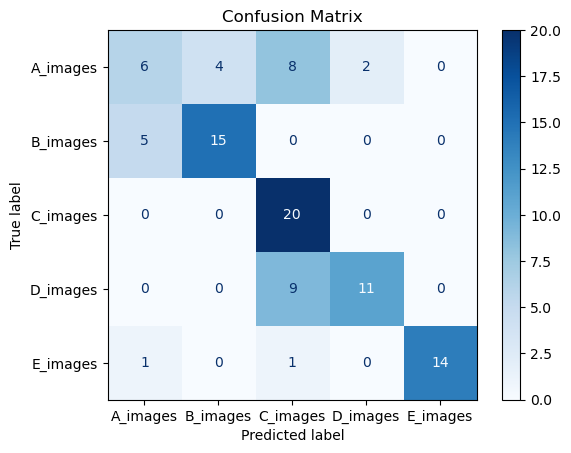

Classification Report:
               precision    recall  f1-score   support

    A_images       0.50      0.30      0.38        20
    B_images       0.79      0.75      0.77        20
    C_images       0.53      1.00      0.69        20
    D_images       0.85      0.55      0.67        20
    E_images       1.00      0.88      0.93        16

    accuracy                           0.69        96
   macro avg       0.73      0.69      0.69        96
weighted avg       0.72      0.69      0.68        96



In [23]:
validation_generator.reset()

y_pred_prob = model.predict(
    validation_generator,
    steps=validation_steps,
    verbose=1
)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true = validation_generator.classes[:len(y_pred)]


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)

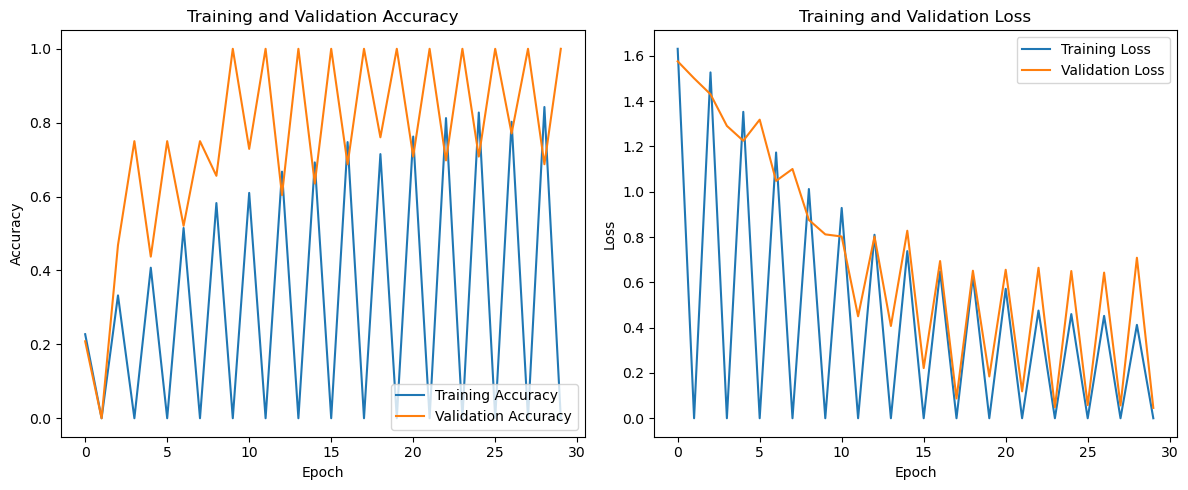

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()